## What is this notebook for?

This scripts it to test:
- the reshaping of the 3d array
- test of histogram calculations
- test of cumulative histogram comparison
- select best feature

NOTE: due to updates of the functions, some of the cells might don't work anymore

#### Import libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from function_resample_array import resamle_array as ra

### create the first array and reshape it

In [22]:
# create a 3d array
arr_big_1 = np.random.rand(91, 109, 91)
print(f"flattened length of big array: {len(arr_big_1.flatten())}",
      f"shape of big array: {arr_big_1.shape}",)

# reshape the array
reshape_factor = 5
arr_small_1 = ra(arr_big_1, (reshape_factor, reshape_factor, reshape_factor))
print(f"flattened length of small array: {len(arr_small_1.flatten())}",
      f"shape of small array: {arr_small_1.shape}",
      f"factor of reduction: {len(arr_big_1.flatten()) / len(arr_small_1.flatten())}")

flattened length of big array: 902629 shape of big array: (91, 109, 91)
flattened length of small array: 7581 shape of small array: (19, 21, 19) factor of reduction: 119.0646352723915


#### plot the array

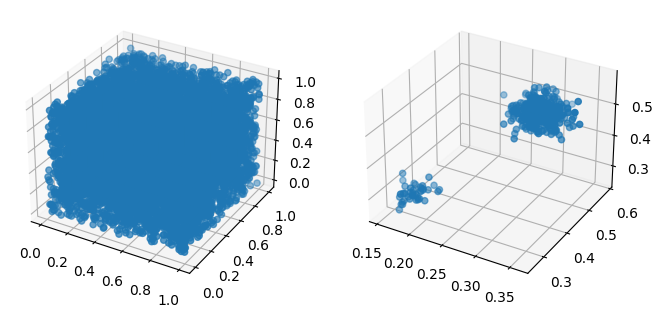

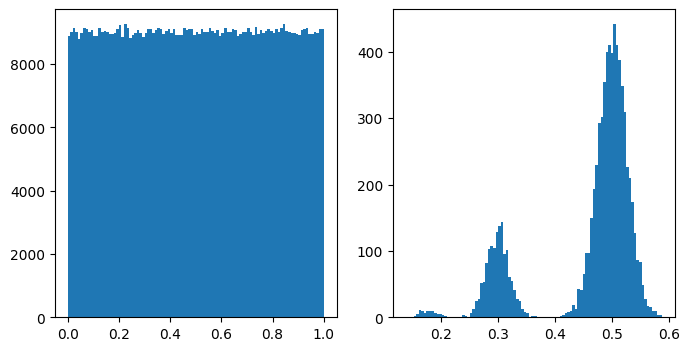

In [23]:
# 3d subplot with big and small array next to each other
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(arr_big_1[:, :, 0], arr_big_1[:, :, 1], arr_big_1[:, :, 2])
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(arr_small_1[:, :, 0], arr_small_1[:, :, 1], arr_small_1[:, :, 2])
plt.show()

# plot histogram of big and small array
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.hist(arr_big_1.flatten(), bins=100)
ax2 = fig.add_subplot(122)
ax2.hist(arr_small_1.flatten(), bins=100)
plt.show()

#### create an entire list of arrays

the shape should be the following (sample, x, y, z)


<function matplotlib.pyplot.show(close=None, block=None)>

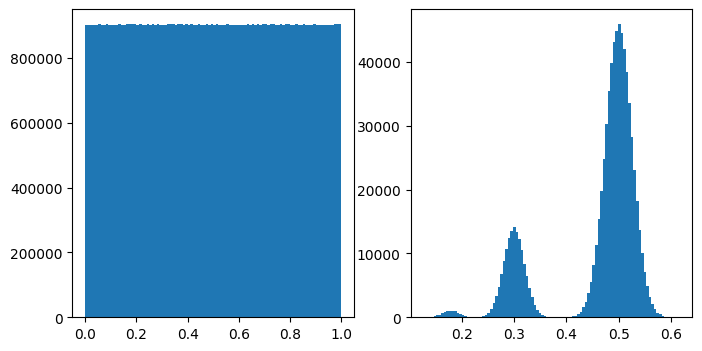

In [24]:
# create an entire list of arrays
# the shape should be the following (sample, x, y, z) = (100, 91, 109, 91)
arr_big = np.random.rand(100, 91, 109, 91)

# reshape the list of arrays
arr_small = np.array([ra(arr_big[i], (reshape_factor, reshape_factor, reshape_factor)) 
                        for i in range(arr_big.shape[0])])

# plot histogram of big and small arr
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
ax1.hist(arr_big.flatten(), bins=100)
ax2 = fig.add_subplot(122)
ax2.hist(arr_small.flatten(), bins=100)
plt.show

In [25]:
arr_small.shape

(100, 19, 21, 19)

#### ground truth array

In [26]:
# array which represents the ground truth with 0 and 1
np.random.seed(3)
arr_gt = np.random.rand(100)
arr_gt[arr_gt < 0.5] = 0
arr_gt[arr_gt >= 0.5] = 1

# count the number of 0 and 1 in the ground truth
print(f"number of 0: {np.count_nonzero(arr_gt == 0)}",
      f"number of 1: {np.count_nonzero(arr_gt == 1)}")

# change some elements of the arr_small to bigger values if the corresponding element in the arr_gt is 1
# arr_small[arr_gt == 1] = arr_small[arr_gt == 1] * 1.1

number of 0: 53 number of 1: 47


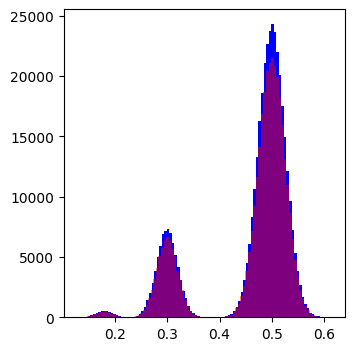

In [27]:
# plot histogram of arr_small, colors are different for 0 and 1
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.hist(arr_small[arr_gt == 0].flatten(), bins=100, color='blue')
ax.hist(arr_small[arr_gt == 1].flatten(), bins=100, color='red', alpha=0.5)
plt.show()

### manipulate data to see importance of a feature

In [28]:
# flatten the arr_small into a 2d array (keep the sample dimension)
arr_small_2d = arr_small.reshape(arr_small.shape[0], -1)
print(f"shape of arr_small_2d: {arr_small_2d.shape}")

shape of arr_small_2d: (100, 7581)


In [29]:
# create a histogram along the sample dimension 
df_small = (pd.DataFrame(arr_small_2d)
            # add a column "ground_truth" as categorical which contains the ground truth
            .assign(ground_truth=pd.Categorical(arr_gt))
            )
# df_small.hist(bins=100, figsize=(8, 4))
df_small

,0,1,2,3,4,5,6,7,8,9,...,7572,7573,7574,7575,7576,7577,7578,7579,7580,ground_truth
0,0.145958,0.321675,0.289073,0.324455,0.283362,0.309754,0.299344,0.306040,0.292106,0.324678,...,0.305232,0.292670,0.311822,0.305934,0.300630,0.317445,0.286412,0.346893,0.174173,1.0
1,0.182552,0.257116,0.293965,0.322291,0.318532,0.302713,0.257420,0.350384,0.289004,0.268102,...,0.295874,0.283280,0.296821,0.299329,0.290098,0.327180,0.321599,0.283583,0.181669,1.0
2,0.177287,0.282815,0.307948,0.304557,0.321663,0.285807,0.316448,0.321488,0.306438,0.297295,...,0.281747,0.293740,0.300577,0.288361,0.291751,0.323813,0.311492,0.324871,0.170673,0.0
3,0.170887,0.354904,0.252024,0.282024,0.313130,0.308327,0.293178,0.305813,0.303234,0.262937,...,0.263700,0.291111,0.290791,0.302211,0.293138,0.300788,0.294335,0.292990,0.193962,1.0
4,0.196766,0.322620,0.323342,0.301072,0.291415,0.350960,0.276901,0.263628,0.329518,0.308143,...,0.301464,0.284809,0.327588,0.269644,0.296048,0.281611,0.293378,0.308782,0.209003,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.188780,0.324560,0.296092,0.290150,0.282030,0.289270,0.277708,0.317560,0.318337,0.270071,...,0.267984,0.322706,0.312387,0.301949,0.321947,0.315409,0.304581,0.327924,0.192327,1.0
96,0.181261,0.296734,0.288071,0.325723,0.304532,0.305032,0.319396,0.275306,0.336420,0.306661,...,0.327611,0.308861,0.293364,0.324678,0.320567,0.282328,0.266185,0.284380,0.187693,1.0
97,0.169964,0.295541,0.302886,0.287885,0.317856,0.319330,0.299495,0.308392,0.307941,0.284172,...,0.328550,0.314783,0.308270,0.269238,0.318165,0.286672,0.277558,0.266077,0.150941,0.0
98,0.189729,0.291354,0.294538,0.296522,0.318668,0.293328,0.313546,0.287516,0.333099,0.293437,...,0.287177,0.312902,0.280751,0.312653,0.304857,0.274492,0.286066,0.285158,0.164494,1.0


<Axes: >

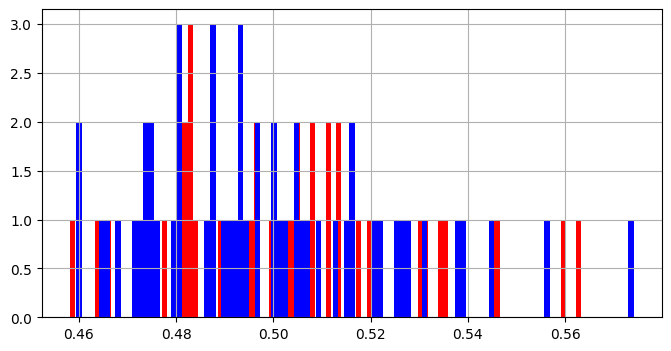

In [30]:
# create histogram for one column
col_nr = 490
df_small.loc[df_small["ground_truth"]==1 , col_nr].hist(bins=100, figsize=(8, 4), color='red')
df_small.loc[df_small["ground_truth"]==0 , col_nr].hist(bins=100, figsize=(8, 4), color='blue')


In [31]:
changed_col = [col_nr, col_nr * 2, col_nr * 3]
df_small.loc[df_small["ground_truth"]==1 , changed_col] *= 1.2

<Axes: >

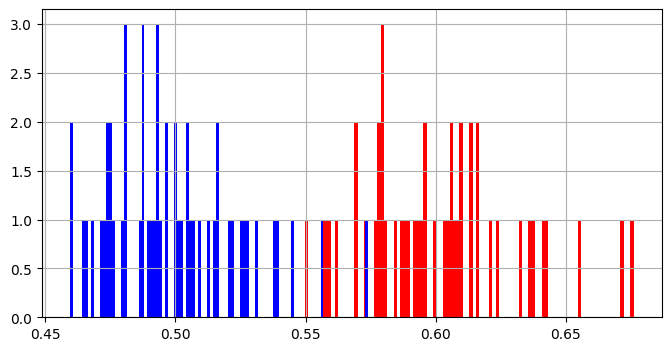

In [32]:
# create histogram for one column
col_nr = 490
df_small.loc[df_small["ground_truth"]==1 , col_nr].hist(bins=100, figsize=(8, 4), color='red')
df_small.loc[df_small["ground_truth"]==0 , col_nr].hist(bins=100, figsize=(8, 4), color='blue')


### Analysis with mean of histogram

In [33]:
# calculate difference between the two histograms
diff = np.abs(df_small.loc[df_small["ground_truth"]==1 , col_nr].mean() 
              - df_small.loc[df_small["ground_truth"]==0 , col_nr].mean())
print(f"difference between the two histograms: {diff}")

difference between the two histograms: 0.10134840669281636


column number = 490, difference = 0.10134840669281636
column number = 980, difference = 0.10035018272631491
column number = 1470, difference = 0.08823304566118495
column number = 3771, difference = 0.018767762498633267
column number = 5089, difference = 0.018338986398354795
column number = 2557, difference = 0.01821219376578792
column number = 4894, difference = 0.018052969306146305
column number = 3700, difference = 0.017726788327289966
column number = 5125, difference = 0.01765745323442769
column number = 6285, difference = 0.01660764456366104


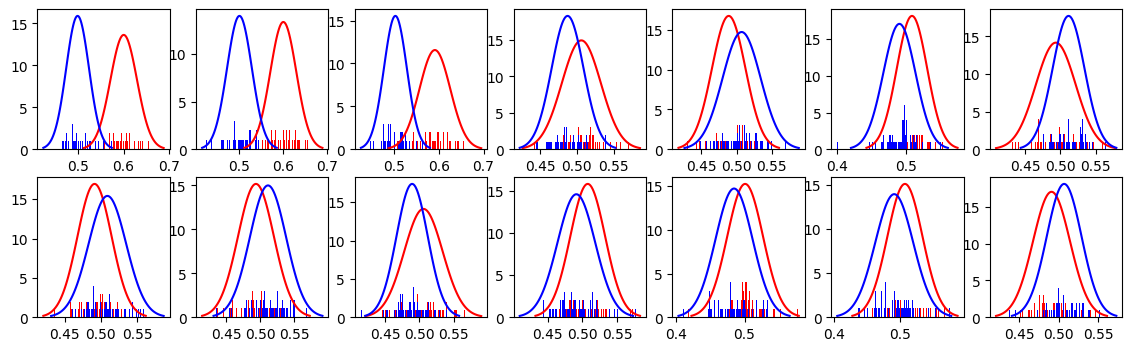

In [34]:
# find the columns with the biggest difference
diff_dict = {}
for col in range(df_small.shape[1] - 1):  # -1 because the last column is the ground truth
    diff = np.abs(df_small.loc[df_small["ground_truth"]==1 , col].mean() 
                  - df_small.loc[df_small["ground_truth"]==0 , col].mean())
    diff_dict[col] = diff
diff_list = sorted(diff_dict.items(), key=lambda x:x[1], reverse=True)  # creates a list of tuples

# print the first 10 pairs of the diff_dict
for i in range(10):
    print(f"column number = {diff_list[i][0]}, difference = {diff_list[i][1]}")

# plot the 10 columns with the biggest difference
fig = plt.figure(figsize=(14, 4))
for i in range(14):
    col = diff_list[i][0]
    ax = fig.add_subplot(2, 7, i+1)
    ax.hist(df_small.loc[df_small["ground_truth"]==1 , col], bins=100, color='red')
    ax.hist(df_small.loc[df_small["ground_truth"]==0 , col], bins=100, color='blue')
    # add bell curve
    mu = df_small.loc[df_small["ground_truth"]==1 , col].mean()
    sigma = df_small.loc[df_small["ground_truth"]==1 , col].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x, norm.pdf(x, mu, sigma), color='red')
    mu = df_small.loc[df_small["ground_truth"]==0 , col].mean()
    sigma = df_small.loc[df_small["ground_truth"]==0 , col].std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x, norm.pdf(x, mu, sigma), color='blue')
plt.show()


### Analysis with diff of cumulative histogram

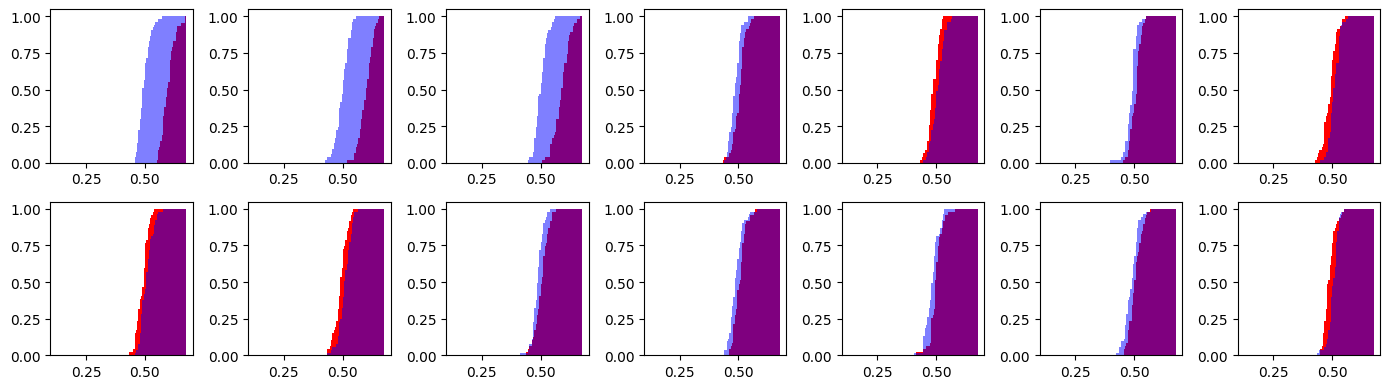

In [35]:
# min and max values of the entire array to set the same range for all histograms (to make sure the binning is the same)
max_value = np.max(df_small.iloc[:, :-1].values)
min_value = np.min(df_small.iloc[:, :-1].values)

# create a cumulative histogram
fig = plt.figure(figsize=(14, 4))
for i in range(14):
    col = diff_list[i][0]
    ax = fig.add_subplot(2, 7, i+1)
    ax.hist(df_small.loc[df_small["ground_truth"]==1 , col], density=True,
            bins=100, color='red', cumulative=True, range=(min_value, max_value))
    ax.hist(df_small.loc[df_small["ground_truth"]==0 , col], density=True,
            bins=100, color='blue', cumulative=True, range=(min_value, max_value), alpha=0.5)
plt.tight_layout()
plt.show()

In [36]:
# calculate the difference between the two cumulative histograms including 
# a resampling (done with the range argument) so that the two histograms have the same bins
cum_diff_dict = {}
for col in df_small.columns[:-1]:  # -1 because the last column is the ground truth
    cum_diff = np.abs(np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==1 , col],
                                                bins=100, density=True,
                                                range=(min_value, max_value)  # resample to have same binning
                                                )[0])
                    - np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==0 , col],
                                                bins=100, density=True,
                                                range=(min_value, max_value)  # resample to have same binning
                                                )[0]))
    cum_diff_dict[col] = cum_diff.sum()
cum_diff_list = sorted(cum_diff_dict.items(), key=lambda x:x[1], reverse=True)  # creates a list of tuples

# print the first 10 pairs of the diff_dict
for i in range(10):
    print(f"column number = {cum_diff_list[i][0]}, area of diff. = {cum_diff_list[i][1]}")

column number = 490, area of diff. = 3368.334118409503
column number = 980, area of diff. = 3327.1089015616285
column number = 1470, area of diff. = 2913.6872233852655
column number = 3771, area of diff. = 638.0406345123145
column number = 5089, area of diff. = 602.2974943729537
column number = 4894, area of diff. = 602.0051169484975
column number = 2557, area of diff. = 585.2665093985803
column number = 5125, area of diff. = 580.880848031786
column number = 6940, area of diff. = 575.6911487477554
column number = 3700, area of diff. = 563.8498630573956


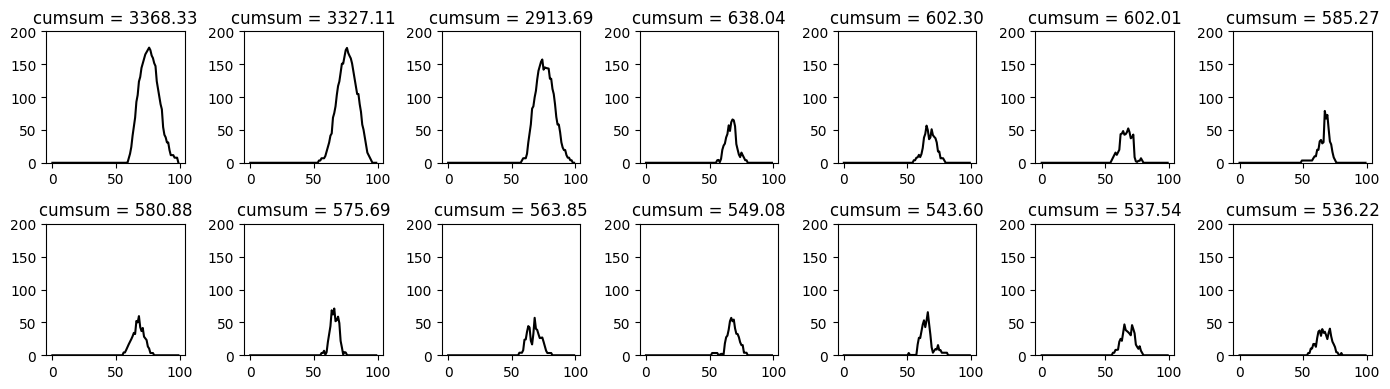

In [37]:
fig = plt.figure(figsize=(14, 4))
for i in range(14):
    col = cum_diff_list[i][0]
    ax = fig.add_subplot(2, 7, i+1)
    diff = np.abs(np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==1 , col], 
                                         bins=100, density=True, 
                                         range=(min_value, max_value)  # resample to have same binning
                                         )[0]) 
                  - np.cumsum(np.histogram(df_small.loc[df_small["ground_truth"]==0 , col], 
                                           bins=100, density=True,
                                           range=(min_value, max_value)  # resample to have same binning
                                           )[0]))
    ax.plot(diff, color='black')
    ax.set_title(f"cumsum = {diff.sum():.2f}")
    ax.set_ylim(0, 200)
    fig.tight_layout()

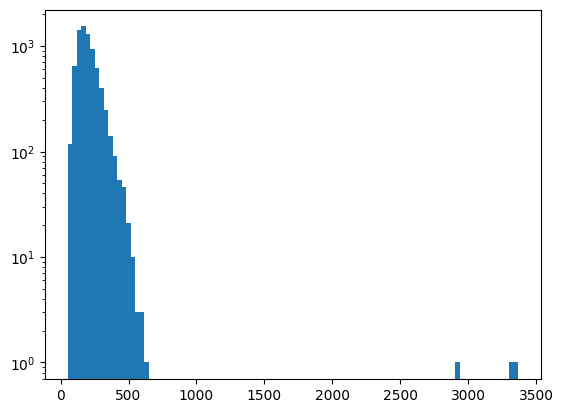

In [38]:
# plot histogram of cum_diff_list
plt.hist([x[1] for x in cum_diff_list], bins=100, log=True);

In [39]:
# create and print list of columns with the biggest difference
feature_list = [cum_diff_list[i][0] for i in range(14)]
print(feature_list)

feature_list_values = [cum_diff_list[i][1] for i in range(14)]
print(feature_list_values)


[490, 980, 1470, 3771, 5089, 4894, 2557, 5125, 6940, 3700, 6285, 1550, 1969, 622]
[3368.334118409503, 3327.1089015616285, 2913.6872233852655, 638.0406345123145, 602.2974943729537, 602.0051169484975, 585.2665093985803, 580.880848031786, 575.6911487477554, 563.8498630573956, 549.0848031225225, 543.6027264140307, 537.5358948566342, 536.2201964465958]
